# Lección 2: La esfera de Bloch

Con este ejemplo exploraremos un poco más sobre la representación gráfica de los estados cuánticos de un qubit. Veremos que la condición de normalización de un estado implica que podemos representarlo por medio de un vector en la denominada **esfera de Bloch**. Posteriormente, consideraremos con un poco más de detalle las propiedades de los operadores de Pauli. Finalmente, trataremos con rigor la definición de los operadores unitarios como rotaciones, y veremos tanto analítica como gráficamente su efecto al actuar sobre un vector de estado.

**SUPRE IMPORTANTE:** En este ejemplo intentaremos presentar al lector el formalismo necesario para estudiar la computación cuántica en forma teórica, así como una posible intuición física sobre la misma. Esta sesióne stá disponible en nuestro servidor de MyBinder.

<p align="center">
  <a href="https://mybinder.org/v2/gh/QC-FEM/QC-CrashCourse/HEAD">
    <img src="https://mybinder.org/badge_logo.svg">
  </a>
</p>

In [1]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np
backend_ = Aer.get_backend('statevector_simulator')

## Vectores de estado en la esfera de Bloch

En la lección 2 hemos visto que los estados de un qubit pueden representarse como vectores en un espacio lineal complejo de dos dimensiones (un espacio de Hilbert para ser más precisos). En particular, tomamos dos **estados ortogonales** como nuestra base

$$|0\rangle \equiv \begin{bmatrix}1 \\ 0\end{bmatrix}$$

$$|1\rangle \equiv \begin{bmatrix}0 \\ 1\end{bmatrix}$$

De modo que todo vector de estado de un qubit puede representarse como una **combinación lineal** de la forma

$$|\psi\rangle = \alpha |0\rangle + \beta|1\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$$

Imponiendo la condición de normalización

$$|\alpha|^2 + |\beta|^2 = 1$$

Como hemos visto, la normalización del vector de estado es fundamental debido a la interpretación probabilística que tienen estos coeficientes. Esta nos capacita para sustituir los parámetros complejos $\alpha$ y $\beta$, por parámetros reales $\theta$ y $\phi$ tales que cualquier estado de un qubit pueda representarse de la forma

$$|\psi\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Invitamos al lector a convencerse de este hecho matemático. Podemos entonces realizar un mapeo uno a uno entre los vectores en un espacio real tridimensional

$$\hat{n} = \sin{\theta}\cos{\phi}\mathrm{\mathbf{x}} + \sin{\theta}\sin{\phi}\mathrm{\mathbf{y}} + \cos{\theta}\mathrm{\mathbf{z}}$$

Y los estados de un qubit. Para unos valores de $\theta$ y $\phi$ dados, módulo $2\pi$, tenderemos un vector de estado y un vector sobre la *esfera unitaria tridimensional*. Esta esfera la denominaremos **esfera de Bloch**, y la utilizaremos para representar el estado de un qubit.

> En la esfera de Bloch es una esfera de radio unitario, cuyos radios vectores desde el centro a la superficie representan todos los posibles estados de un qubit.

Procederemos a visualizar la esfera de Bloch por medio de la función ```plot_bloch_multivector``` de Qiskit. Vamos a considerar el estado de un qubit

$$|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Invitamos al lector a comprobar que este estado corresponde a $\phi = 0$, $\theta = \pi/2$. Iniciamos un par de variables con estos valores

In [2]:
theta = np.pi/2
phi = 0

Ahora procederemos a definir un ```ndarray``` que representará el vector de estado. 

In [3]:
estado = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])

Y a visualizarlo por medio de Qiskit

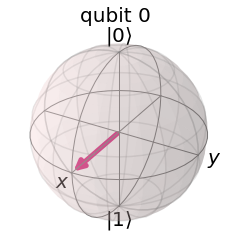

In [4]:
plot_bloch_multivector(estado)

Observamos que la representación del vector de estado en la esfera de Bloch es un vector unitario apuntando en dirección $x$ positiva. Además, los vectores de la base ortogonal que hemos escogido para nuestro espacio (denominada base computacional), corresponden a direcciones opuestas sobre el eje $z$. El qubit 0 está en el estado $|0\rangle$, mientras que el qubit 1 se encuentra en el estado $|1\rangle$

**SUPER IMPORTANTE:** Recordamos que el estado de un sistema de vario qubits está descrito por el **producto de Kroenecker** de los estados de cada subsistema, en el caso de estados no entrelazados. Para generar un estado de dos qubits 

$$|1\rangle_1 \otimes |0\rangle_0$$

Utilizamos la función de numpy ```numpy.kron```. La convención de inicialización es que el estado de más a la derecha en un producto de Kroenecker (producto directo), corresponde el qubit 0. Esto es consistente con la forma como uno escribiría una cadena binaria en un papel.

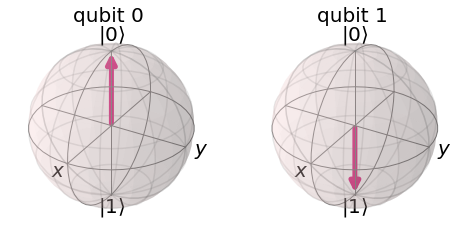

In [5]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([0,1],[1,0])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

Debido a su importancia, consideraremos otros conjuntos de vectores de estado que se representan como vectores sobre los ejes cartesianos de la esfera de Bloch

### Estados sobre el eje $x$

A partir de la convención que hemos manejado, estos corresponden a los estados

$$|+\rangle = \frac{1}{2}(|0\rangle + |1\rangle)$$

$$|-\rangle = \frac{1}{2}(|0\rangle - |1\rangle)$$

Como veremos en lecciones posteriores, realizar una medición en esta base es fundamental para muchos protocolos cuánticos. A continuación presentamos una representación gráfica de estos estados en la esfera de Bloch. El qubit 0 se encuentra en el estado $|+\rangle$, mientras que el qubit se encuentra en el estado $|-\rangle$.

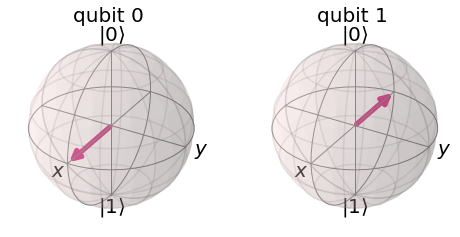

In [6]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([np.sqrt(1/2),-np.sqrt(1/2)],[np.sqrt(1/2),np.sqrt(1/2)])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

### Estados sobre el eje $y$

A partir de la convención que hemos manejado, estos corresponden a los estados

$$|+\mathrm{i}\rangle = \frac{1}{2}(|0\rangle + \mathrm{i} |1\rangle)$$

$$|-\mathrm{i}\rangle = \frac{1}{2}(|0\rangle - \mathrm{i} |1\rangle)$$

A continuación presentamos una representación gráfica de estos estados en la esfera de Bloch. El qubit 0 se encuentra en el estado $|+\mathrm{i}\rangle$, mientras que el qubit 1 se encuentra en el estado $|-\mathrm{i}\rangle$.

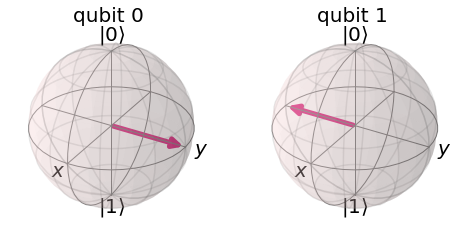

In [7]:
## Creamos un estado de 2 qubits y cargamos la base de signo
base_signo = np.kron([np.sqrt(1/2),-1j*np.sqrt(1/2)],[np.sqrt(1/2),1j*np.sqrt(1/2)])
## Dibujamos los estados en la esfera de Bloch
plot_bloch_multivector(base_signo)

## Operadores unitarios como rotaciones

Con la representación de Bloch, podremos describir todas las compuertas cuánticas como rotaciones del vector de Bloch de un estado de un qubit. Para ilustrar este hecho, consideraremos los operadores de Pauli: $\hat{X}$, $\hat{Y}$, $\hat{Z}$; y su acción sobre un vector de estado de un qubit. A partir de ellos, definiremos las rotaciones sobre un eje en la esfera de Bloch. Posteriormente, consideraremos la forma matemática de un operador unitario general, y veremos que coincide con la de un operador de rotación. Finalmente, consideraremos como ejemplos importantes las compuertas de Hadamard, Fase y T.

**IMPORTANTE:** El operador identidad, que denotaremos $\hat{I}$, no realiza ninguna trnasformación sobre un qubit, y corresponde a la matriz

$$\hat{I} = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$$

### Operadores de Pauli

Como es conocido a partir de la lección teórica, los sistemas cuánticos cerrados evolucionan por medio de **operadores unitarios**. En este curso idealizaremos los sistemas de uno o más qubits como sistemas cerrados.

> En computación cuántica, una compuerta realiza evolución temporal unitaria de un estado de varios qubits. Recordamos que los operadores unitarios satisfacen la relación
> $$\hat{U}\hat{U}^{\dagger} = \hat{U}^{\dagger}\hat{U} = \hat{I}$$
> Donde $\hat{I}$ es el operador identidad del sistema.

**IMPORTANTE:** La daga ($\dagger$) implica realizar una transposición, y luego sustituir las entradas por su complejo conjugado.

En una base particular, que corresponde a dos estados mutuamente excluyentes, las compuertas de un qubit se representan con **matrices $2 \times 2$**. La acción de una compuerta sobre el estado de un qubit se representa por medio de un **producto matricial**. Los operadores fundamentales de un qubit son

$$\hat{X} = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix}$$

$$\hat{Y} = \begin{bmatrix}0 & -\mathrm{i} \\ \mathrm{i} & 0\end{bmatrix}$$

$$\hat{Z} = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$$

Estos son denominados **operadores de Pauli**. Vamos a estudiar la acción de cada uno de estos operadores en la esfera de Bloch. Puesto que trabajamos en un espacio lineal, esto es suficiente para especificar la acción sobre cualquier estado de un qubit.

#### Operador $\hat{X}$

Como es de esperar, el operador $\hat{X}$ es el análogo cuántico de la compuerta NOT clásica:

$$\hat{X}|0\rangle = |1\rangle$$
$$\hat{X}|1\rangle = |0\rangle$$

Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

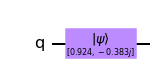

In [24]:
## Parametros vector de Bloch
theta = np.pi/4
phi = 3*np.pi/2
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoX = QuantumCircuit(1)
## Cargamos el estado inicial
demoX.initialize(psi_i,0)
## Dibujamos el circuito
demoX.draw(output='mpl')

Ahora incluimos una compuerta $\hat{X}$ de Pauli y simulamos el circuito

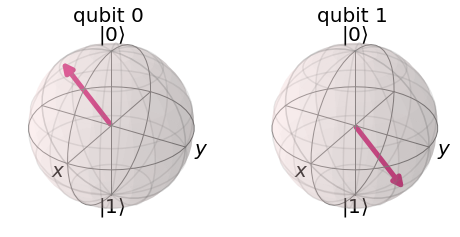

In [25]:
## Inlcuimos X de Pauli
demoX.x(0)
## Simulamos el circuito
simulacion = execute(demoX,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{X}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{x}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

#### Operador $\hat{Y}$

El operador $\hat{Y}$ de Pauli tiene una acción similar a la compuerta NOT clásica:

$$\hat{X}|0\rangle = -\mathrm{i}|1\rangle$$
$$\hat{X}|1\rangle = \mathrm{i}|0\rangle$$

Pero agregando una fase adicional de $\pi/2$. Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

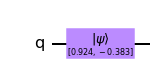

In [27]:
## Parametros vector de Bloch
theta = np.pi/4
phi = np.pi
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoY = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoY.initialize(psi_i,0)
## DYbujamos el circuito
demoY.draw(output='mpl')

Ahora incluimos una compuerta $\hat{Y}$ de Pauli y simulamos el circuito

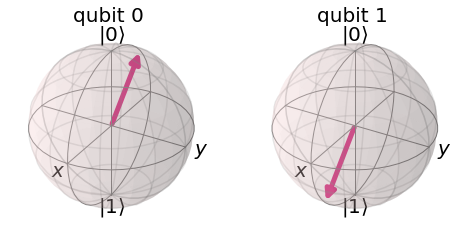

In [28]:
## Inlcuimos Y de Pauli
demoY.y(0)
## Simulamos el circuito
simulacion = execute(demoY,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{Y}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{y}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

#### Operador $\hat{Z}$

A partir de la definición de producto matricial, notamos que:

$$\hat{X}|0\rangle = |0\rangle$$
$$\hat{X}|1\rangle = -|1\rangle$$

Diremos que la base computacional es la **base de autoestados** del operador $\hat{Z}$ de Pauli, pues los deja invariantes salvo una fase relativa de $\pi/4$. Vamos a visualizar su acción en la esfera de Bloch por medio de Qiskit. Para ello, utilizaremos el ```statevector_simulator``` de Qiskit. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\theta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\theta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

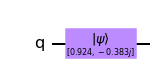

In [33]:
## Parametros vector de Bloch
theta = np.pi/4
phi = -np.pi/2
psi_i = np.array([np.cos(theta/2),np.exp(1j*phi)*np.sin(theta/2)])
## Creamos un circuito de 1 qubit
demoZ = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoZ.initialize(psi_i,0)
## DYbujamos el circuito
demoZ.draw(output='mpl')

Ahora incluimos una compuerta $\hat{Y}$ de Pauli y simulamos el circuito

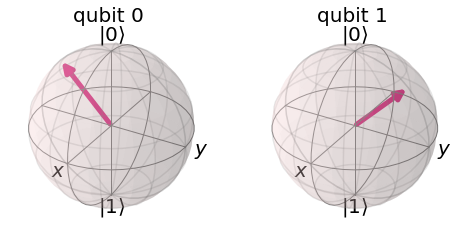

In [34]:
## Inlcuimos Y de Pauli
demoZ.z(0)
## Simulamos el circuito
simulacion = execute(demoZ,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

El qubit 0 representa el estado inicial, mientras que qubit 1, el final. Podemos notar que la compuerta ha rotado el estado inicial.

> La compuerta $\hat{Z}$ de Pauli corresponde a una rotación de $\pi$ radianes con respecto al eje $\hat{z}$ de la esfera de Bloch, en el sentido contrario a las manecillas del reloj.

### Compuertas arbitrarias y operadores de Pauli

Por los postulados de la mecánica cuántica, las compuertas de un qubit pueden representarse por medio de matrices, que a su vez conforman un espacio lineal. Esto significa que existe un conjunto de **operadores base**, $\{\hat{O}_1, \hat{O}_2, \hat{O}_3, \hat{0}_4\}$, tales que todo operador puede representarse de la forma

$$\hat{U} = \sum_{i=1}^{4} \gamma_i \hat{O}_i$$

Invitamos al lector a demostrar que el conjunto $\{\hat{I},\hat{X},\hat{Y},\hat{Z}\}$ es una base para el espacio de operadores de un qubit. Por tanto, cualquier compuerta que actúe sobre un qubit puede representarse de la forma

$$\hat{U} = \gamma_0 \hat{I} + \gamma_x \hat{X} + \gamma_y \hat{Y} + \gamma_z \hat{Z}$$

Realizaremos la definición

$$\vec{\gamma} \cdot \sigma = \gamma_x \hat{X} + \gamma_y \hat{Y} + \gamma_z \hat{Z}$$

De modo que cualquier compuerta de un qubit puede representarse como una combinación lineal

$$\hat{U} = \gamma_0 \hat{I} + \vec{\gamma} \cdot \sigma$$

Nuestra tarea consistirá en demostrar que la condición de unitaridad de las compuertas cuánticas implica que estas pueden visualizarse como rotaciones alrededor de un eje particular de la esfera de Bloch. Al finalizar, consideraremos 3 compuertas importantes para la computación cuántica: Hadamard, compuerta S y compuerta T.

#### Rotaciones generales en la esfera de Bloch

Invitamos al lector a demostrar que para cualquier vector real $\vec{\theta} = (\theta_x,\theta_y,\theta_z)$, el operador

$$\vec{\theta}\cdot \sigma = \theta_x \hat{X} + \theta_y \hat{Y} + \theta_z \hat{Z}$$

Es **hermítico**. Esto significa que $(\vec{\theta}\cdot\sigma)^{\dagger} = \vec{\theta}\cdot\sigma$. Aún más, invitamos al lector a convencerse de que todo operador hermítico que actúa sobre un qubit puede escribirse de la forma

$$\hat{H} = \alpha \hat{I} + \vec{\theta}\cdot\sigma$$

Con $\alpha$ y $\vec{\theta}$, cantidades reales. Para cualquier operador unitario $\hat{U}$ actuando sobre un qubit, existe un operador hermítico $\hat{H}$ tal que

$$\hat{U} = \mathrm{e}^{-\mathrm{i}\hat{H}}$$

**SUPER IMPORTANTE:** Definimos la exponencial de un operador como

$$\mathrm{e}^{\hat{H}} = \sum_{n = 0}^{\infty} \frac{1}{n!}\hat{H}^n$$

Puesto que cada vector real $\vec{\theta}$ puede expresarse en términos de un vector unitario paralelo $\hat{n}$ como $\vec{\theta} = \theta \hat{n}$, vemos que cualquier operador unitario de un qubit puede representarse de la forma

$$\hat{U} = \mathrm{e}^{-\mathrm{i}\alpha}\mathrm{e}^{-\mathrm{i}\theta \hat{n} \cdot \sigma}$$

Definiremos los **operadores de rotación** alrededor de un eje $\hat{n}$, por un ángulo $\theta$ como

$$R_{\hat{n}}(\theta) = \mathrm{e}^{-\mathrm{i}\theta \hat{n} \cdot \sigma}$$

> Por tanto, todo operador unitario de un qubit pude representarse como una rotación alrededor de un eje, más una fase global.
> $$\hat{U} = \mathrm{e}^{-\mathrm{i}\alpha}R_{\hat{n}}(\theta)$$

De acuerdo con nuestra notación, la fase global corresponde al *escalar* $\mathrm{e}^{-\mathrm{i}\alpha}$. Hasta este punto la discusión ha sido bastante abstracta, así que ilustraremos por qué los operadores que hemos definido se denominan rotaciones. Para ello, estudiaremos compuertas que implementan estos operadores en Qiskit.

##### Rotaciones alrededor del eje $\hat{z}$

Estudiaremos primero las compuertas de rotación sobre el eje $\hat{z}$. En Qiskit, las llamaremos por medio de la función miembro ```circuito.rz(theta,qubit)```. Primero, iniciamos el qubit con un estado normalizado particular

$$|\psi_I\rangle = \cos{\frac{\beta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\beta}{2}} |1\rangle$$

Utilizando la rutina ```initialize```.

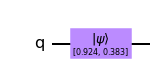

In [5]:
## Parametros vector de Bloch
beta = np.pi/4
phi = 0
psi_i = np.array([np.cos(beta/2),np.exp(1j*phi)*np.sin(beta/2)])
## Creamos un circuito de 1 qubit
demoRz = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoRz.initialize(psi_i,0)
## DYbujamos el circuito
demoRz.draw(output='mpl')

Luego aplicaremos una compuerta $R_{\hat{z}}(\theta)$, y simularemos el circuito

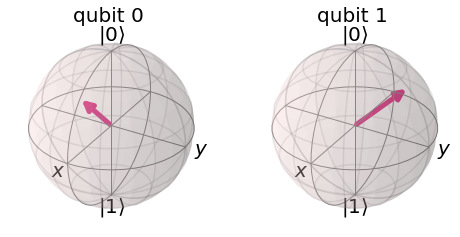

In [6]:
## Definimos angulo de rotacion
theta = np.pi/2
## Inlcuimos Y de Pauli
demoRz.rz(theta,0)
## Simulamos el circuito
simulacion = execute(demoRz,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

Como es costumbre, el qubit 0 representa el estado inicial, mientras que el qubit 1, el final.

> Como podemos observar, el efecto de una compuerta de este tipo es realizar una rotación del vector de Bloch de un qubit un ángulo $\theta$ con repecto al eje $\hat{z}$, en sentido antihorario.

**IMPORTANTE:** En muchas librerías como Qiskit o Cirq, podremos especificar rotaciones solo alrededor de los ejes principales de la esfera de Bloch. En particular, utilizando ```circuito.ry(theta,qbit)``` y ```circuito.rx(theta,qbit)```, podremos especificar rotaciones alrededor de los ejes $\hat{y}$ y $\hat{x}$, respectivamente.

### Rotaciones especiales

De todas las posibles rotaciones en la esfera de Bloch, que ya sabemos que corresponden a compuertas que pueden implmentarse en un circuito cuántico, existen algunas que son de gran utilidad en el desarrollo de ciertos algoritmos. Consideraremos en esta lección

* La compuerta Hadamard
* Las compuertas $\hat{S}$

#### Compuerta de Hadamard

Esta corresponde a una rotación alrededor de un eje 

$$\hat{n} = \frac{1}{\sqrt{2}}(\hat{x} + \hat{z})$$

Con un ángulo $\theta = \pi$, en sentido antihorario. Tal vez esta no sea la descripción más conocida de la compuerta de Hadamard, notada con $\hat{H}$. Típicamente suele representarse matricialmente

$$\hat{n} = \frac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix}$$

Para entender por qué la descripción en términos de rotaciones, vamos a ver el efecto de la compuerta sobre el vector de Bloch del estado de un qubit

$$|\psi_I\rangle = \cos{\frac{\beta}{2}} |0\rangle + \mathrm{e}^{\mathrm{i}\phi}\sin{\frac{\beta}{2}} |1\rangle$$

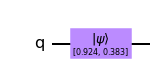

In [10]:
## Parametros vector de Bloch
beta = np.pi/4
phi = 0
psi_i = np.array([np.cos(beta/2),np.exp(1j*phi)*np.sin(beta/2)])
## Creamos un circuito de 1 qubit
demoH = QuantumCircuit(1)
## Adjuntamos una compuerta X
demoH.initialize(psi_i,0)
## DYbujamos el circuito
demoH.draw(output='mpl')

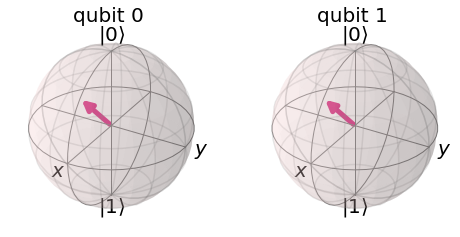

In [11]:
## Definimos angulo de rotacion
theta = np.pi/2
## Inlcuimos Y de Pauli
demoH.h(0)
## Simulamos el circuito
simulacion = execute(demoH,backend_).result()
## Guardamos el vector de estado final
psi_f = simulacion.get_statevector()
## Dibujamos los estados
plot_bloch_multivector(np.kron(psi_f,psi_i))

Notamos que el vector de estado con $\beta = \pi/4$, $\phi = 0$, permanece invariante bajo la acción de la compuerta Hadamard. Esto es porque se encuentra *paralelo al eje de rotación*. Al considerar un vector de estado de la base computacional, podremos ver fácilmente que el ángulo de rotación es $\theta = \pi$.

> El uso más extendido de la compuerta Hadamard es la denominada *transformada de Hadamard*. Esta es un truco cuántico que permite construir una superposición uniforme de todos los estados base de un sistema de varios Qubits.

Puesto que las compuertas cuánticas son *operadores lineales*, podemos utilizar la trasformada de Hadamard para ejecutar un *algoritmo clásico* (o cuántico) teniendo como entrada todos los posibles estados de la base computacional de un sistema de $n$-qubits. Esto es lo que denominamos **paralelismo maximal**. Ilustraremos este hecho por medio de un viejo conocido: *el sumador de 1 bit*.

Consideremos un circuito de 2 registros: uno de 2 qubits para contener los números a sumar, y otro de 1 qubit utilizado para hacer el cómputo reversible. En lugar de inicializar los bits a sumar utilizando compuertas $\hat{X}$ de Pauli (o NOT en nuestra jerga de computación reversible), utilizaremos compuertas $\hat{H}$.

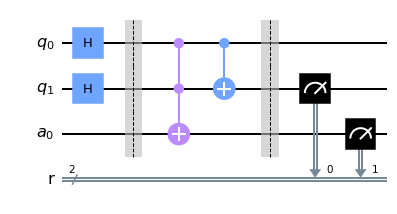

In [29]:
## Creamos registros de sumador
entrada = QuantumRegister(2,name='q')
ancila = QuantumRegister(1,name='a')
## Recordemos que siempre hay que medir el resultado
resultado = ClassicalRegister(2,name='r')
## Creamos el circuito cuantico
Sumador = QuantumCircuit(entrada,ancila,resultado)

## Inicializamos con compuertas H
for bit in entrada:
    Sumador.h(bit)
## Colocamos barrera por claridad
Sumador.barrier()

## Disponemos compuertas del sumador
Sumador.ccx(*entrada,ancila)
Sumador.cx(*entrada)
## Colocamos barrera por claridad
Sumador.barrier()

## Medimos el resultado de la suma
Sumador.measure(entrada[1],resultado[0])
Sumador.measure(ancila,resultado[1])

## Dibujamos el circuito
Sumador.draw(output='mpl')

Esta vez vamos a ejecutar el circuito con nuestro emulador local de procesadores cuánticos ideales.

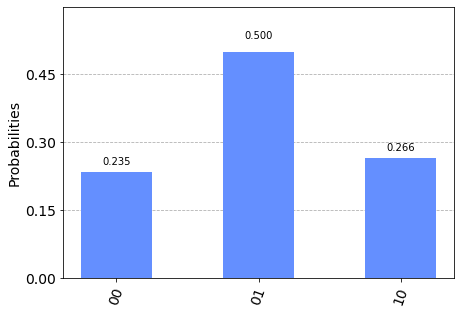

In [47]:
simulator = Aer.get_backend('qasm_simulator')
## Simulamos el circuito
resultados = execute(Sumador,simulator,shots=4096).result().get_counts()
## Dibujamos el histograma de resultados
plot_histogram(resultados)

##### Análisis del ejemplo de paralelismo maximal

El sumador lo conocemos bien, sabemos que suma dos números de 1 bit, produciendo como salida un número de 2 bits. Vamos a considerar en detalle el primer módulo: las compuertas de Hadamard. Cuando aplicamos simultáneamente cada una de estas compuertas a un registro de $n$-qubits, diremos que aplicamos una *transformada de Hadamard* sobre el registro. El estado inicial del registro ```entrada``` es

$$|\psi_i\rangle = |0\rangle_1 \otimes |0\rangle_2$$

A partir de la definición de la compuerta Hadamard, después de realizar la transformada, el estado del registro es

$$|\psi_i\rangle = \frac{1}{2}(|0\rangle_2 + |1\rangle_2) \otimes (|0\rangle_2 + |1\rangle_2)$$

Al realizar el producto tensorial, vemos que el estado del registro luego de la transformada de Hadamard es

$$|\psi_i\rangle = \frac{1}{2}(|00\rangle + |10\rangle + |01\rangle + |11\rangle)$$

**NOTA:** Utilizamos la notación $|q_0q_1\rangle = |q_0\rangle \otimes |q_1\rangle$

Recordemos que vamos a sumar los dos bits de nuestro registro de entrada. Con la transformada de Hadamard hemos creado una *superposición* de todas las posibles parejas de bits que podemos sumar, *con igual probabilidad*.

> Puesto que las compuertas cuánticas actúan linealmente sobre un sistema de $n$-qubit, el truco nos permite sumar todas las posibles parejas de bits.

Notemos que la probabilidad de medir un valor de suma $s = 01_2$ es el doble que la probabilidad de obtener otros resultados. Esto se debe a que

$$0 + 1 = 1 + 0 = 01$$

Y a que la transformada nos produce una superposición uniforme. ¿Cuál es el estado de los qubits del circuito justo antes de la medición?

**SUPER SUPER IMPORTANTE:** El paralelismo maximal que produce la transformada de Hadamard está limitado por la medición del sistema. El tercer postulado nos dice que la medición de un qubit colapsa su función de onda a un estado de la base computacional. Por tanto, al ejecutar el circuito *una sola vez*, solo obtenemos un resultado. Al repetir el circuito varias veces, obtenemos resultados distintos con una distribución de probabilidad como la que hemos visto.

Encontrar algoritmos que permitan aprovechar el paralelismo maximal de la computación cuántica es uno de los retos fundamentales de esta área. En el curso veremos algunos algoritmos que son capaces de aprovecharlo con *solo una llamda a la subrutina clásica*.

#### Compuertas $\hat{S}$

Definimos estas compuertas como rotaciones por un ángulo $\theta = \pi/2$, alrededor de alguno de los ejes principales de la esfera de Bloch, más una fase adicional

$$S_{\hat{n}} = \mathrm{e}^{\mathrm{i}\frac{\pi}{4}}R_{\hat{n}}(\pi/2)$$

De particular relevancia es la compuerta

$$S_{\hat{x}} = \mathrm{e}^{\mathrm{i}\frac{\pi}{4}}R_{\hat{x}}(\pi/2)$$

Que realiza un cuarto de vuelta en la esfera de Bloch, alrededor del eje $\hat{x}$. También se denota como $\sqrt{X}$, ya que $\hat{S}_{\hat{x}}^2 = \hat{X}$.

> Esta compuerta, junto con las rotaciones sobre el eje $\hat{z}$ y la compuerta $\hat{X}$ de Pauli, se utilizan para *implementar* una compuerta de un qubit arbitraria en los dispositivos de IBM Q.

Vamos a ver un ejemplo. Crearemos un circuito simple, con solo una rotación sobre el eje $\hat{y}$. Posteriormente, ejecutaremos el circuito en un dispositivo de IBM Q, denominado ```ibmq_armonk```.

**NOTA:** Para observar la descomposición del circuito, es necesario tener una cuenta en IBM Q.

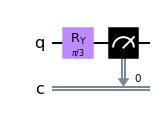

In [3]:
## Creamos circuito
demoSx = QuantumCircuit(1,1)
## Incluimos la rotacion
demoSx.ry(np.pi/3,0)
## Medimos el qubit
demoSx.measure(0,0)
## Dibujamos el circuito
demoSx.draw(output='mpl')

Para correr un circuito en un dispositivo de IBM debemos convertir nuestro circuito cuántico debemos primero *transpilarlo* y luego *ensamblarlo*. El proceso de **transpilación** transforma el conjunto de operaciones que hemos definido en nuestro circuito, en un conjunto de operaciones *base* que el dispositivo deseado puede ejecutar. Como hemos mencionado, la compuerta $\hat{S}_\hat{x}$ es una de ellas. El proceso de **ensamblaje**, transforma nuestro circuito transpilado en un conjunto de instrucciones fundamentales, expresadas en *Quantum Assembler* (QASM). Estas son solo un nivel superior a la ejecución de pulsos de microondas en los qubits superconductores de un dispositivo de IBM Q.

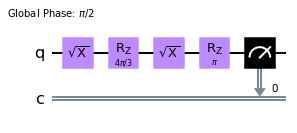

In [6]:
## Importamos paquetes para correr en IBM Q
from qiskit import IBMQ, assemble, transpile
from qiskit.assembler import disassemble
## CARGAMOS CUENTA DE IBM
# IBMQ.load_account()
## Definimos el proveedor de servicios
proveedor = IBMQ.get_provider('ibm-q')
## Definimos el dispositivo en el que vamos a correr el circuito
qpu = proveedor.get_backend('ibmq_armonk')
## Transpilamos el circuito
transp = transpile(demoSx,qpu)
## Ensamblamos instrucciones para ejecucion
inst = assemble(transp)
## dibujamos el circuito transpilado
transp.draw(output='mpl')

Ahora podemos proceder a correr nuestro circuito en Armonk, simplemente tenemos que utilizar la función ```run```.

<ipython-input-7-612191b60161>:3: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  ejecucion = qpu.run(inst)


Job Status: job has successfully run


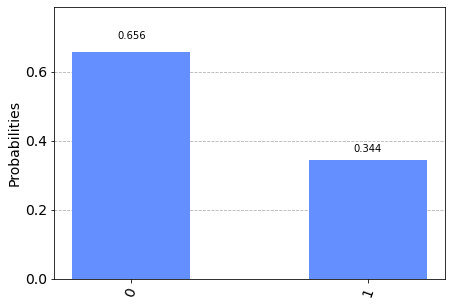

In [7]:
from qiskit.tools.monitor import job_monitor
## Ejecutamos nuestro circuito en un dispositivo de IBM
ejecucion = qpu.run(inst)
## Podemos monitorear la ejecucion del circuito
job_monitor(ejecucion)
## Generamos el histograma de resultados
plot_histogram(ejecucion.result().get_counts())

Tal vez esto pueda parecer un poco engorroso para el lector que proviene de un contexto de ciencias de la computación. Sin embargo, su importancia estriba en que el aprovechamiento de la naturaleza cuántica de un qubit está condicionado por su interacción con el ambiente que lo rodea.

> Hay un límite al número de compuertas que pueden actuar secuencialmente sobre un qubit. Eso es una consecuencia de que el **tiempo de coherencia** de un qubit sea finito

En términos sencillos, el tiempo de coherencia es el tiempo máximo durante el cual podemos aprovechar la naturaleza cuántica de un sistema de qubits. Si realizamos cómputos que tomen más tiempo, la interacción de nuestro computador con su entorno creará **correlaciones**, que introducirán **ruido** en los resultados que obtengamos. 

> No entraremos aquí en detalles sobre la razón, pero la descomposición de compuertas de un qubit en aplicaciones sucesivas de rotaciones sobre el eje $\hat{z}$ y compuertas $S_{\hat{x}}$ permiten aprovechar mejor el tiempo de coherencia finito de los qubits.

## Perspectivas

Para conocer más sobre las compuertas que pueden programarse con Qiskit, referimos a la [Documentación Oficial](https://qiskit.org/documentation/qc_intro.html). Hemos profundizado un poco en las compuertas que hemos considerado las más relevantes para un curso introductorio. Invitamos al lector a demostrar que cualquier operador unitario de un qubit puede descomponerse de la forma

$$\hat{U} = R_{\hat{z}}(\phi - \pi/2) \hat{S}_{\hat{x}} R_{\hat{z}}(\pi - \theta) \hat{S}_{\hat{x}} R_{\hat{z}}(\lambda - \pi/2)$$

A menos de una fase global. En general, las rotaciones sobre el eje $\hat{z}$ se pueden implementar con bajo error. Por tanto, esta descomposición enfatiza la implementación de compuertas $\hat{S}$ de alta fidelidad. Estas suelen implmentarse por medio de pulsos de microondas, denominados **pulsos $\pi/2$**. Para entender mejor la implementación de estos pulsos, invitamos al lector a revisar nuestro ejemplo práctico sobre la simulación de la resonancia de espín. Incluimos un bosquejo de la demostración matemática rigurosa de que toda compuerta de un qubit puede interpretarse como una rotación en la esfera de Bloch.

## Referencias

* Nielsen & Chuang. **Quantum Computation and Quantum Information**. Cambridge University Press, 2010.
* Beck. **Quantum Mechanics Theory and Experiments**. Cambridge University Press, 2012.
* Ataman. **The quantum optical description of a double Mach-Zehnder interferometer**. arXiv:1407.1704 [physics.optics]. 2014.
* Ekert. **From Interferometers to Quantum Computers**. Supplementary material, Mathematical Institute, University of Oxford, 2010.
* Wilde. **Quantum Information Theory**. Cambridge University Press, 2013.

Muchas gracias por leer esta publicación! Abajo se encuentran links a las lecciones siguientes en el Crash Course de QC-FEM.

## Apéndice: Demostración matemática

Invitamos al lector a convencerse de que

$$(\vec{a} \cdot \sigma) (\vec{b} \cdot \sigma) = (\vec{a} \cdot \vec{b}) \hat{I} + (\vec{a} \times \vec{b}) \cdot \sigma$$

Puesto que

$$\hat{U}^{\dagger} = \gamma_0^{*} \hat{I} + \vec{\gamma}^{*} \cdot \sigma$$

Obtenemos la expresión para el producto $\hat{U}^{\dagger}\hat{U}$

$$\hat{U}^{\dagger}\hat{U} = (|\gamma_0|^2 + |\gamma|^2)\hat{I} + 2 \text{Re}(\gamma_0 \vec{\gamma}) \cdot \sigma + \mathrm{i}(\vec{\gamma}^{*} \times \vec{\gamma}) \cdot \sigma$$

Puesto que $\hat{U}$ es un operador unitario, debe ser que

$$|\gamma_0|^2 + |\gamma|^2 = 1$$

Por tanto, podemos definir

$$\gamma_0 = \mathrm{e}^{\mathrm{i}\delta}\cos{\frac{\theta}{2}}$$

$$|\gamma| = \sin{\frac{\theta}{2}}$$

De modo que

$$\vec{\gamma} = \sin{\frac{\theta}{2}} \hat{m}$$

Donde $\hat{m}$ es un vector unitario, complejo en general. Invitamos al lector a convencerse que la condición

$$2 \text{Re}(\gamma_0 \vec{\gamma}) = - \mathrm{i} \vec{\gamma}^{*} \times \vec{\gamma}$$

Necesaria para que el operador $\hat{U}$ sea unitario, implica que

$$\hat{m} = \mathrm{e}^{\mathrm{i}\epsilon}\hat{n}$$

Siendo $\hat{n}$ un *vector unitario real*. Finalmente, invitamos al lector a convencerse de que

$$\mathrm{e}^{\mathrm{i}(\epsilon - \delta)} = -\mathrm{i}$$

> Por tanto, cualquier compuerta cuántica actuando sobre un qubit puede representarse por una combinación de la forma
>
> $$\hat{U} = \mathrm{e}^{\mathrm{i}\alpha}(\cos{\frac{\theta}{2}}\hat{I} -\mathrm{i}\sin{\frac{\theta}{2}}\hat{n} \cdot \sigma)$$
>
> Para ciertos valores de los parámetros *reales* $\alpha$, $\gamma$, $\theta$, $\phi$

Finalmente, invitamos al lector a demostrar que

$$R_{\hat{n}}(\theta) = \mathrm{e}^{-\mathrm{i}\theta \hat{n} \cdot \sigma} = \cos{\frac{\theta}{2}}\hat{I} -\mathrm{i}\sin{\frac{\theta}{2}}\hat{n} \cdot \sigma$$

Con lo cual, hemos demostrado que

$$\hat{U} = \mathrm{e}^{\mathrm{i}\alpha}R_{\hat{n}}(\theta)$$

Para cualquier operador unitario de un qubit arbitrario.